# AsaPy

### Asa Analysis

#### Analysis.anova

    """
    Perform ANOVA test on the given DataFrame columns and conduct Multiple pairwise comparisons (Post-hoc test)
    if more than two variables are being compared.

    Args:
        df (pd.DataFrame): DataFrame containing the samples.
        columns (List[str], optional): Columns to be analyzed. If None, all columns are used. Defaults to None.
        alpha (float, optional): Significance level. Defaults to 0.05.
        show_plots (bool, optional): If True, plots will be displayed for visual analysis. Defaults to True.
        save_path (Optional[str], optional): Path to save the generated plots and results. If None, the plots are 
            displayed and results are printed without saving. If provided, plots and results will be saved to the 
            specified path. Directory structure will be created if not exists. Defaults to None.
        save_path (Optional[str], optional): Path to save the generated plots and results. If None, the plots are 
            displayed and results are printed without saving. If provided, plots and results will be saved to the 
            specified path. Directory structure will be created if not exists. Defaults to None.

    Returns:
        Tuple[pd.DataFrame, Optional[pd.DataFrame]]: ANOVA summary and optionally Post-hoc test results.
        Tuple[pd.DataFrame, Optional[pd.DataFrame]]: ANOVA summary and optionally Post-hoc test results.
    """

### Teste de Hipóteses

ANOVA (ANalysis Of VAriance)

- O teste ANOVA é usado para comparar as médias de mais de 2 grupos
- As diferenças das médias dos grupos são inferidas analisando-se as variâncias
- A ANOVA usa o teste F baseado em variância para verificar a igualdade da média do grupo. O teste F é uma proporção da variância entre grupos pela variância dentro do grupo. Às vezes, o teste F da ANOVA também é chamado de teste omnibus, pois testa uma hipótese nula não específica, ou seja, todas as médias dos grupos são iguais

- Hipóteses ANOVA 
    - Hipótese nula: As médias dos grupos são iguais (sem variação nas médias dos grupos)
    - H0: μ1 = μ2 = ... = μp
    - Hipótese alternativa: Pelo menos, uma média do grupo é diferente dos outros grupos
    - H1: Todas as μ não são iguais

**Resíduos**

- Resíduos são as diferenças entre os valores observados e os valores previstos pelo modelo. No contexto de ANOVA, os resíduos representam as diferenças entre cada ponto de dados e a média correspondente do seu grupo (ou a média prevista pelo modelo inteiro, se houver vários fatores envolvidos).

- Analisar os resíduos pode ser uma parte vital da verificação se as suposições de um modelo linear foram cumpridas. Padrões ou tendências nos resíduos podem indicar violações dessas suposições. Os resíduos devem idealmente ser normalmente distribuídos e ter variância constante.

**Quantis Teóricos**

- Quantis teóricos, também conhecidos como pontos quantil-quantil (QQ), são os valores esperados dos quantis de uma distribuição normal padrão. Quando plotados contra os quantis reais de um conjunto de dados, eles formam o que é conhecido como um gráfico QQ.

- Um gráfico QQ é um método gráfico usado para ajudar a avaliar se um conjunto de dados segue uma distribuição teórica particular, como a distribuição normal. Se os pontos em um gráfico QQ estiverem ao longo de uma linha diagonal reta (geralmente y = x), isso indica que os dados seguem a distribuição esperada.

**Usando o Gráfico QQ com Resíduos**

- Ao avaliar a suposição de normalidade em ANOVA, é comum plotar os resíduos contra os quantis teóricos da distribuição normal usando um gráfico QQ. Isso fornece uma maneira visual de ver se os resíduos seguem uma distribuição normal.

- Se os resíduos seguirem uma distribuição normal, os pontos no gráfico QQ estarão aproximadamente ao longo da linha y = x. Se eles desviarem dessa linha, especialmente de maneira sistemática, isso pode indicar não normalidade nos resíduos, violando potencialmente uma suposição de ANOVA.

- Os gráficos QQ são valiosos, especialmente para grandes tamanhos de amostra, pois comunicam visualmente informações sobre a distribuição dos resíduos, permitindo um julgamento rápido sobre as suposições de normalidade. Eles podem frequentemente revelar sutilezas que podem não ser detectadas por testes estatísticos formais, como o teste de Shapiro-Wilk.

In [1]:
# Imports
import numpy as np
import pandas as pd
import asapy

# Creating Analysis object
Analysis = asapy.Analysis()

np.random.seed(42)  # For reproducibility

# Simulating data for three groups
group_a = np.random.normal(loc=5, scale=2, size=30)
group_b = np.random.normal(loc=7, scale=2, size=30)
group_c = np.random.normal(loc=8, scale=2, size=30)

df = pd.DataFrame({
    'Group A': group_a,
    'Group B': group_b,
    'Group C': group_c
})

df.head()  # To visually inspect the first few rows of the dataset

2023-12-19 17:07:44.279788: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 17:07:44.332522: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 17:07:44.333926: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 17:07:45.355339: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow backend


,Group A,Group B,Group C
0,5.993428,5.796587,7.041652
1,4.723471,10.704556,7.628682
2,6.295377,6.973006,5.787330
3,8.046060,4.884578,5.607587
4,4.531693,8.645090,9.625052


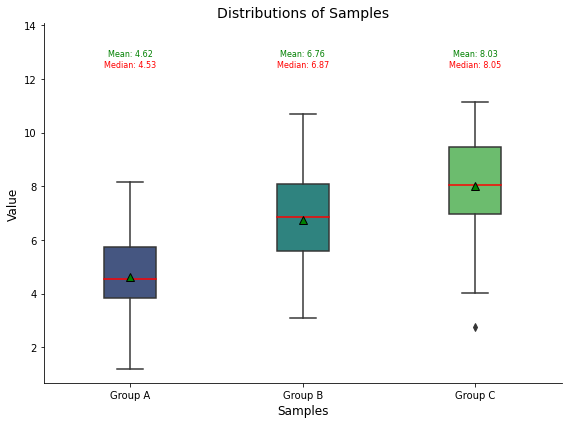

Running ANOVA test

Residuals DO follow a normal distribution.

Variances ARE homogeneous across the groups.



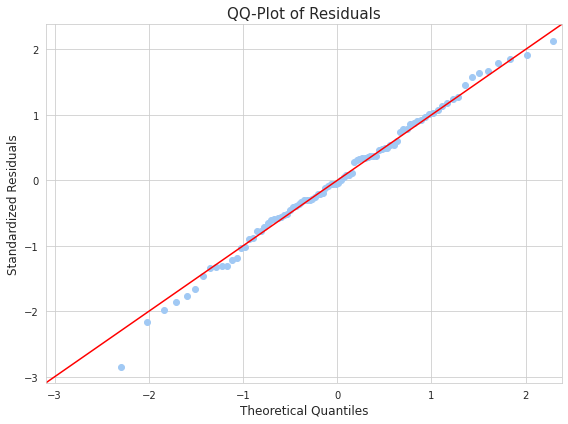

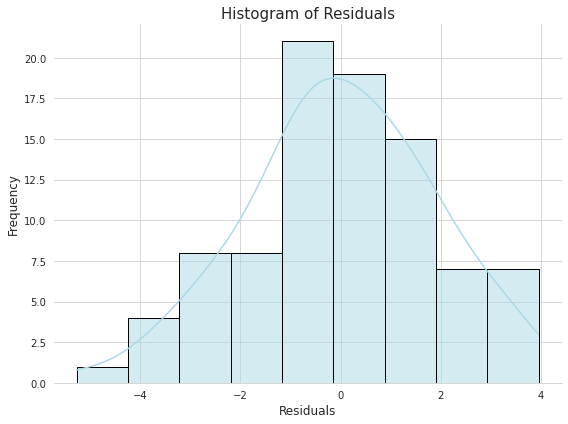

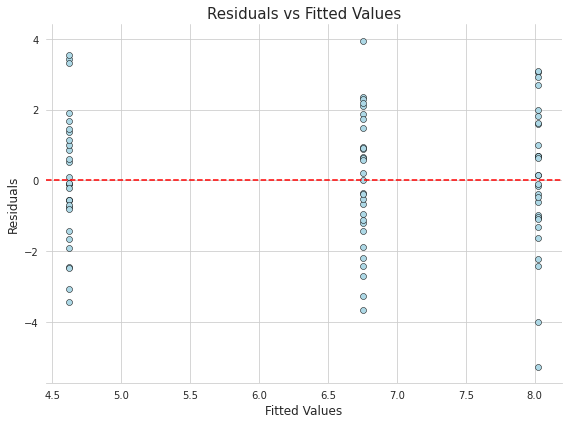


ANOVA Summary:

                sum_sq    df          F        PR(>F)
C(samples)  177.359216   2.0  24.994316  2.650394e-09
Residual    308.675214  87.0        NaN           NaN
The ANOVA test result is significant. There is a statistical difference among the samples.


Post-hoc (Tukey HSD) Test Results:

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower  upper  reject
----------------------------------------------------
Group A Group B    2.134 0.0001 0.9743 3.2937   True
Group A Group C   3.4021    0.0 2.2424 4.5617   True
Group B Group C   1.2681 0.0287 0.1084 2.4278   True
----------------------------------------------------


In [2]:
# Use the method to run the ANOVA test on the synthetic dataset
anova_table, post_hoc_results = Analysis.anova(df, columns=['Group A', 'Group B', 'Group C'], alpha=0.05, show_plots=True, save_path=None)
